In [1]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This data is formatted atrociously. So lots of these operations are cleaning things up in pandas

In [32]:
data_dir = "../data/dayflow/"
files = [os.path.join(data_dir,x) for x in os.listdir(data_dir) if "wy" not in x]
years = range(1997, 2019)

In [33]:
dfs= []
for i in sorted(files):
    print(i)

    if not "2017" in i:
        df = pd.read_csv(i)
        idx = df.index.get_loc('monthly totals')
        out = df[idx+2:]
#         out.index = [10,11,12,1,2,3,4,5,6,7,8,9]
        out.drop("X2", axis =1, inplace = True)
        dfs.append(out)
    else:
        a = pd.read_csv(i)
        a.set_index(a.columns[0])
        idx = df.index.get_loc('monthly totals')
        out = df[idx+2:]
#         out.index = [10,11,12,1,2,3,4,5,6,7,8,9]
        out.drop("X2", axis = 1, inplace = True)
        dfs.append(out)

../data/dayflow/dayflowCalculations1997.csv
../data/dayflow/dayflowCalculations1998.csv
../data/dayflow/dayflowCalculations1999.csv
../data/dayflow/dayflowCalculations2000.csv
../data/dayflow/dayflowCalculations2001.csv
../data/dayflow/dayflowCalculations2002.csv
../data/dayflow/dayflowCalculations2003.csv
../data/dayflow/dayflowCalculations2004.csv
../data/dayflow/dayflowCalculations2005.csv
../data/dayflow/dayflowCalculations2006.csv
../data/dayflow/dayflowCalculations2007.csv
../data/dayflow/dayflowCalculations2008.csv
../data/dayflow/dayflowCalculations2009.csv
../data/dayflow/dayflowCalculations2010.csv
../data/dayflow/dayflowCalculations2011.csv
../data/dayflow/dayflowCalculations2012x_10-25-2013.csv
../data/dayflow/dayflowCalculations2013x_2-20-2015.csv
../data/dayflow/dayflowCalculations2014a_9-24-2015.csv
../data/dayflow/dayflowCalculations2015-05-31-2017.csv
../data/dayflow/dayflowCalculations2016.csv
../data/dayflow/dayflowCalculations2017.csv
../data/dayflow/dayflowCalculat

In [66]:
data = {}

for i,x in enumerate(years):
    df = dfs[i]
    df2 = df.rename(index=str, columns={"Year": "DIVER", "Mo": "EFFEC", "Date": "EFFDIV"})
    df2.drop(df.columns[-3:], axis = 1, inplace = True)
    df2.index = pd.date_range(start = str(x) + "-01-01", periods = 12, freq ='M') 
    data[x] = df2


In [67]:
q_out = []

for k,v in data.items():
    v.OUT = pd.to_numeric(v.OUT)* 1.23348e-6
    q_out.append(v.OUT)

In [68]:
monthly = pd.concat(q_out)

Text(0.5,1,'Dayflow $Q_{out}$')

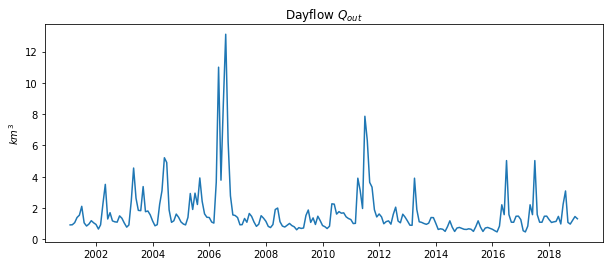

In [82]:
# Get data from 2001 onwards only

mask = (monthly.index > "01-01-2001")

plt.figure(figsize = (10,4))
plt.plot(monthly.loc[mask])
plt.ylabel("$km^3$")
plt.title("Dayflow $Q_{out}$")

In [ ]:
# Write Q_out_net (inflows - outflow at CA Aqueduct) to file for CV balance

In [74]:
monthly.loc[mask].to_csv("../data/Qs_out_monthly.csv")

In [90]:
# Write Q_out (outflow at CA Aqueduct) to file for SSJT balance

mask = (pd.concat(q_out).index > "01-01-2001")
pd.concat(q_out).loc[mask].to_csv("../data/SSJT_Qs_out_monthly.csv")